In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## 1.1

### 1.1.3

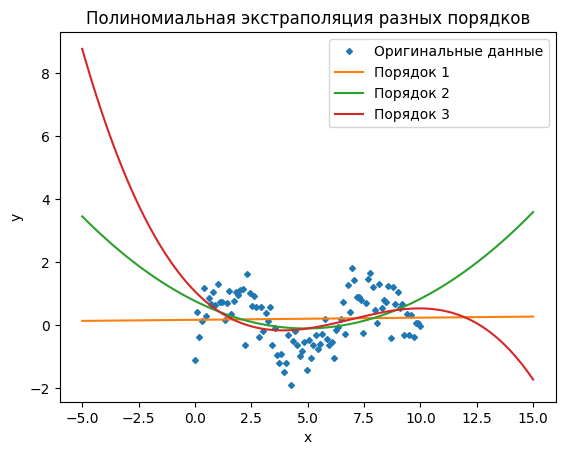

In [177]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.randn(100)

degrees = [1, 2, 3]

fig, ax = plt.subplots()

ax.plot(x, y, marker='D', markersize=3, linestyle='None', label='Оригинальные данные')

for degree in degrees:
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    x_ext = np.linspace(-5, 15, 100)
    y_ext = poly(x_ext)
    ax.plot(x_ext, y_ext, label=f'Порядок {degree}')

ax.set_title('Полиномиальная экстраполяция разных порядков')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

### 1.1.5

In [178]:
xdata = np.linspace(0, 5, 50)
beta = (0.25, 0.75)

In [179]:
def f1(x, b0, b1):
    return b0 + b1*x

def f2(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2

def f3(x, b0, b1):
    return b0 + b1*np.log(x)

def f4(x, b0, b1):
    return b0*x**b1

In [180]:
def fit_and_plot(func, xdata, ydata, func_name):
    beta_opt, beta_cov = curve_fit(func, xdata, ydata)
    y_fit = func(xdata, *beta_opt)
    
    # Вычисление отклонений
    residuals = ydata - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    print(f"Функция {func_name}:")
    print(f"Оптимальные параметры: {beta_opt}")
    print(f"R-квадрат: {r_squared:.4f}")
    
    plt.plot(xdata, ydata, 'o', label='Данные')
    plt.plot(xdata, y_fit, label=func_name)
    plt.legend()
    plt.show()

In [181]:
xdata = np.linspace(0.1, 10, 100)
beta = (0.15, 0.85)

Функция Линейная:
Оптимальные параметры: [0.17638521 0.85013627]
R-квадрат: 1.0000


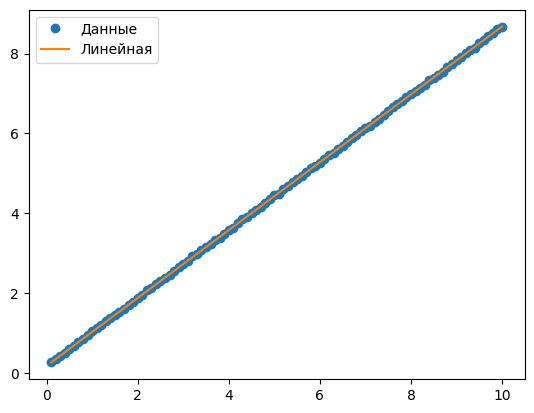

In [182]:
ydata = f1(xdata, *beta) + 0.05*np.random.rand(len(xdata))
fit_and_plot(f1,xdata, ydata, "Линейная")

Функция Квадратичная:
Оптимальные параметры: [0.15624254 0.84231684 0.5007966 ]
R-квадрат: 1.0000


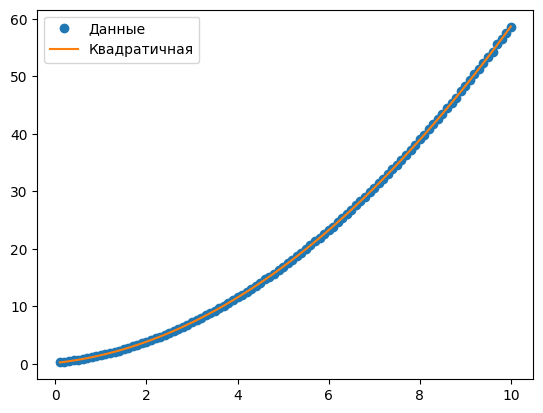

In [183]:
ydata = f2(xdata, *beta, 0.5) + 0.05*np.random.randn(len(xdata))
fit_and_plot(f2, xdata, ydata, "Квадратичная")

Функция Экспоненциальная:
Оптимальные параметры: [0.14595727 0.8510329 ]
R-квадрат: 0.9952


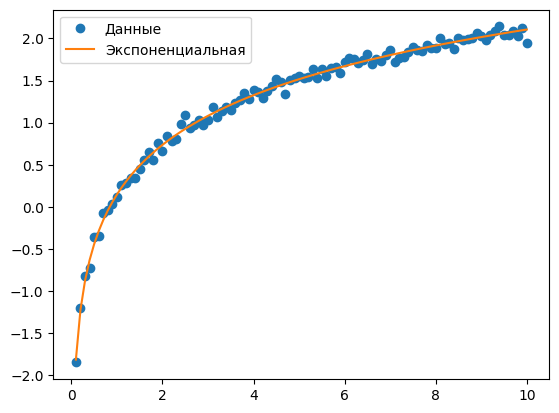

In [184]:
ydata = f3(xdata, *beta) + 0.05*np.random.randn(len(xdata))
fit_and_plot(f3, xdata, ydata, "Экспоненциальная")

Функция Логарифмическая:
Оптимальные параметры: [0.16034719 0.81776004]
R-квадрат: 0.9787


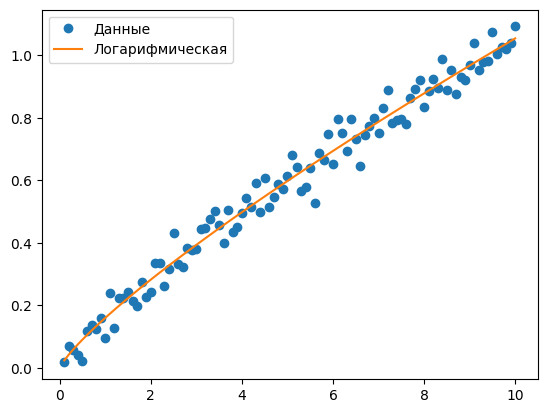

In [185]:
ydata = f4(xdata, *beta) + 0.05*np.random.randn(len(xdata))
fit_and_plot(f4, xdata, ydata, "Логарифмическая")

Линейная функция:
- Изменение свободного члена (сдвига по оси Oy) сдвигает график вверх или вниз параллельно самой себе
- Изменение коэффициента при x (угла наклона) изменяет крутизну графика. При положительном коэффициенте график возрастает, при отрицательном – убывает

Квадратичная функция:
- Изменение свободного члена сдвигает параболу вверх или вниз
- Изменение коэффициента при x² определяет направление ветвей параболы (вверх или вниз)
- Изменение коэффициента при x сдвигает вершину параболы вдоль оси Ox

Экспоненциальная функция:
- Изменение основания степени определяет скорость роста или убывания функции
- Изменение показателя степени влияет на скорость изменения функции

Логарифмическая функция:
- Изменение основания логарифма изменяет скорость роста функции
- Добавление константы сдвигает график вверх или вниз

## 1.2

### 1.2.1

In [186]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [187]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [188]:
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

In [189]:
print(X.shape, y.shape)

(30, 1) (30, 1)


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [191]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [192]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.9779208335417602

In [193]:
y_pred = model.predict(X_test_scaled)

In [194]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_results.describe()

,Actual,Predicted
count,8.000000,8.000000
mean,84406.250000,87485.823990
std,34056.938453,32032.579447
min,37731.000000,41056.257055
25%,56759.250000,64271.040522
50%,86324.500000,87016.838465
75%,113718.500000,116328.433753
max,122391.000000,123597.709384


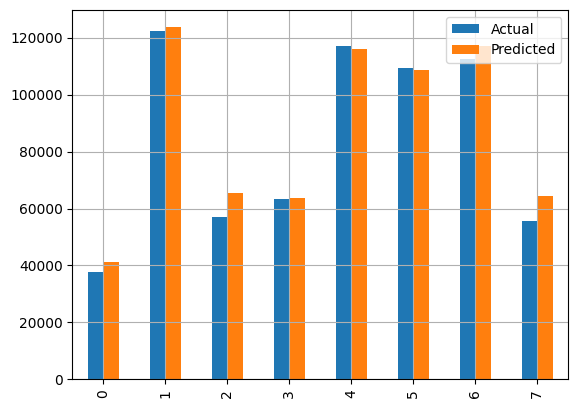

In [195]:
df_results.plot(kind='bar')
plt.grid()
plt.show()


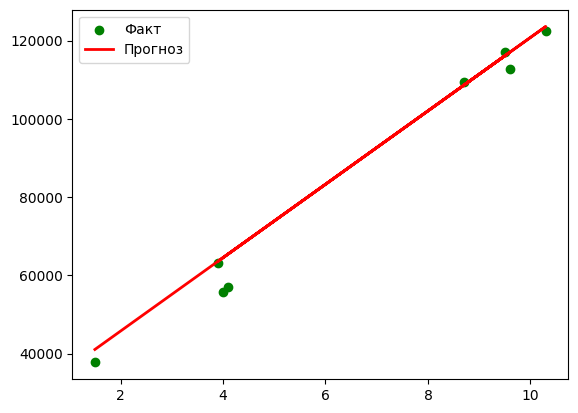

In [205]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.legend(['Факт', 'Прогноз'])
plt.show()

## 1.3

### 1.3.2

In [207]:
wine_quality_link = \
    'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

In [209]:
df = pd.read_csv(wine_quality_link)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
sns.